In [1]:
import os
from joblib import Parallel, delayed
import time
import numpy as np
import pickle
import pylab as pl
import pandas as pd

# import jupyternotify
import pylab as pl
import subprocess
import concurrent.futures
import shutil

# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)


In [2]:
# %%file node_setup/cre_setup_3_scale_1_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 10, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 11, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 9,
# 12, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 10,
# 13, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 11,
# 14, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 12,
# 15, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 13,
# 16, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,

In [3]:
# # 10, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
# %%file node_setup/cre_setup_1_scale_1_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 10, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 9,
# 11, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 10,
# 12, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 11,
# 13, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 12,
# 14, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 13,
# 15, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [4]:
%%file node_setup/cre_setup_1_scale_1_node_info.csv
node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
4, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
5, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 4,
6, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 5,
7, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 6,
8, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 7,
9, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




Overwriting node_setup/cre_setup_1_scale_1_node_info.csv


In [5]:
# %%file node_setup/cre_setup_3_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 44,
# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 69,
# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,




In [6]:
# %%file node_setup/cre_setup_2_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,

# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 44,

# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 69,

# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [7]:
# %%file node_setup/cre_setup_1_scale_5_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,

# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,

# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,
# 36, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 36,
# 37, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 37,
# 38, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 38,
# 39, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 39,
# 40, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 40,
# 41, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 41,
# 42, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 42,
# 43, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 43,
# 44, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 44,

# 45, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 46, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,
# 58, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 56,
# 59, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 57,
# 60, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 58,
# 61, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 59,
# 62, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 60,
# 63, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 61,
# 64, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 62,
# 65, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 63,
# 66, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 64,
# 67, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 65,
# 68, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 66,
# 69, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 67,
# 70, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 68,
# 71, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 69,

# 72, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [8]:
# %%file node_setup/cre_setup_2_scale_1_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 10, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
# 11, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 9,
# 12, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 10,
# 13, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 11,
# 14, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 12,
# 15, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 13,
# 16, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [9]:
# %%file node_setup/cre_setup_3_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 1, -1,
# 20, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 2, -1,

In [10]:
# %%file node_setup/cre_setup_3_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'ap-south-1', 0, 0, 'FKA.pem', -1, 0,
# 1, 'ap-south-1', 0, 0, 'FKA.pem', -1, 1,
# 2, 'ap-south-1', 0, 0, 'FKA.pem', -1, 2,
# 3, 'ap-south-1', 0, 0, 'FKA.pem', -1, 3,
# 4, 'ap-south-1', 0, 0, 'FKA.pem', -1, 4,
# 5, 'ap-south-1', 0, 0, 'FKA.pem', -1, 5,
# 6, 'ap-south-1', 0, 0, 'FKA.pem', -1, 6,
# 7, 'ap-south-1', 0, 0, 'FKA.pem', -1, 7,
# 8, 'ap-south-1', 0, 0, 'FKA.pem', -1, 8,
# 9, 'ap-south-1', 0, 0, 'FKA.pem', -1, 9,
# 10, 'ap-south-1', 0, 0, 'FKA.pem', -1, 10,
# 11, 'ap-south-1', 0, 0, 'FKA.pem', -1, 11,
# 12, 'ap-south-1', 0, 1, 'FKA.pem', -1, 12,
# 13, 'ap-south-1', 0, 1, 'FKA.pem', -1, 13,
# 14, 'ap-south-1', 0, 1, 'FKA.pem', -1, 14,
# 15, 'ap-south-1', 0, 1, 'FKA.pem', -1, 15,
# 16, 'ap-south-1', 0, 1, 'FKA.pem', -1, 16,
# 17, 'ap-south-1', 0, 1, 'FKA.pem', -1, 17,
# 18, 'ap-south-1', 0, 1, 'FKA.pem', -1, 18,
# 19, 'ap-south-1', 0, 1, 'FKA.pem', -1, 19,
# 20, 'ap-south-1', 0, 1, 'FKA.pem', -1, 20,
# 21, 'ap-south-1', 0, 1, 'FKA.pem', -1, 21,
# 22, 'ap-south-1', 0, 1, 'FKA.pem', -1, 22,
# 23, 'ap-south-1', 0, 1, 'FKA.pem', -1, 23,
# 24, 'ap-south-1', 0, 1, 'FKA.pem', -1, 24,
# 25, 'ap-south-1', 0, 1, 'FKA.pem', -1, 25,
# 26, 'ap-south-1', 0, 1, 'FKA.pem', -1, 26,
# 27, 'ap-south-1', 1, -1, 'FKA.pem', 0, -1,
# 28, 'ap-south-1', 1, -1, 'FKA.pem', 1, -1,
# 29, 'eu-central-1', 0, 2, 'FKE.pem', -1, 27,
# 30, 'eu-central-1', 0, 2, 'FKE.pem', -1, 28,
# 31, 'eu-central-1', 0, 2, 'FKE.pem', -1, 29,
# 32, 'eu-central-1', 0, 2, 'FKE.pem', -1, 30,
# 33, 'eu-central-1', 0, 2, 'FKE.pem', -1, 31,
# 34, 'eu-central-1', 0, 2, 'FKE.pem', -1, 32,
# 35, 'eu-central-1', 0, 2, 'FKE.pem', -1, 33,
# 36, 'eu-central-1', 0, 2, 'FKE.pem', -1, 34,
# 37, 'eu-central-1', 0, 2, 'FKE.pem', -1, 35,
# 38, 'eu-central-1', 0, 2, 'FKE.pem', -1, 36,
# 39, 'eu-central-1', 0, 2, 'FKE.pem', -1, 37,
# 40, 'eu-central-1', 0, 2, 'FKE.pem', -1, 38,
# 41, 'eu-central-1', 0, 2, 'FKE.pem', -1, 39,
# 42, 'eu-central-1', 0, 2, 'FKE.pem', -1, 40,
# 43, 'eu-central-1', 0, 2, 'FKE.pem', -1, 41,
# 44, 'eu-central-1', 1, -1, 'FKE.pem', 2, -1,




In [11]:
# %%file node_setup/cre_setup_3_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [12]:
# %%file node_setup/cre_setup_2_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,

# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 20, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,

# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [13]:
# %%file node_setup/cre_setup_1_scale_2_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,

# 18, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 19, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 20, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 18,
# 21, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 19,
# 22, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 20,
# 23, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 21,
# 24, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 22,
# 25, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 23,
# 26, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 24,
# 27, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 25,
# 28, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 26,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,

# 30, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [14]:
# %%file node_setup/cre_setup_1_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,

# 27, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 28, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 28,
# 31, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 29,
# 32, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 30,
# 33, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 31,
# 34, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 32,
# 35, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 33,
# 36, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 34,
# 37, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 35,
# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,

# 44, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [15]:
# %%file node_setup/cre_setup_2_scale_3_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,
# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 28, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,
# 29, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 27,
# 30, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 28,
# 31, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 29,
# 32, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 30,
# 33, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 31,
# 34, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 32,
# 35, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 33,
# 36, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 34,
# 37, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 35,
# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [16]:
# %%file node_setup/cre_setup_2_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 1, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [17]:
# %%file node_setup/cre_setup_1_scale_4_node_info.csv
# node_id,region,ServerOrClientregion,cluster_id,key_file,clientID,ServerID, PublicIp
# 0, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 0,
# 1, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 1,
# 2, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 2,
# 3, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 3,
# 4, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 4,
# 5, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 5,
# 6, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 6,
# 7, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 7,
# 8, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 8,
# 9, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 9,
# 10, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 10,
# 11, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 11,
# 12, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 12,
# 13, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 13,
# 14, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 14,
# 15, 'europe-west3-c', 0, 0, 'FKA.pem', -1, 15,

# 16, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 16,
# 17, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 17,
# 18, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 18,
# 19, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 19,
# 20, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 20,
# 21, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 21,
# 22, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 22,
# 23, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 23,
# 24, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 24,
# 25, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 25,
# 26, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 26,
# 27, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 27,
# 28, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 28,
# 29, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 29,
# 30, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 30,
# 31, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 31,
# 32, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 32,
# 33, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 33,
# 34, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 34,
# 35, 'europe-west3-c', 0, 1, 'FKA.pem', -1, 35,

# 36, 'europe-west3-c', 1, -1, 'FKA.pem', 0, -1,
# 37, 'europe-west3-c', 1, -1, 'FKA.pem', 2, -1,

# 38, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 36,
# 39, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 37,
# 40, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 38,
# 41, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 39,
# 42, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 40,
# 43, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 41,
# 44, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 42,
# 45, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 43,
# 46, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 44,
# 47, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 45,
# 48, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 46,
# 49, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 47,
# 50, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 48,
# 51, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 49,
# 52, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 50,
# 53, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 51,
# 54, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 52,
# 55, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 53,
# 56, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 54,
# 57, 'asia-south1-c', 0, 2, 'FKE.pem', -1, 55,

# 58, 'asia-south1-c', 1, -1, 'FKE.pem', 1, -1,




In [18]:
# config_list = ['cre_setup_1_scale_1_node_info',\
#                'cre_setup_1_scale_2_node_info',\
#                'cre_setup_1_scale_3_node_info',\
#                'cre_setup_1_scale_5_node_info',\
#                'cre_setup_2_scale_1_node_info',\
#                'cre_setup_2_scale_2_node_info',\
#                'cre_setup_2_scale_3_node_info',\
#                'cre_setup_2_scale_5_node_info',\
#                'cre_setup_3_scale_1_node_info',\
#                'cre_setup_3_scale_2_node_info',\
#                'cre_setup_3_scale_3_node_info',\
#                'cre_setup_3_scale_4_node_info',\
#                'cre_setup_3_scale_5_node_info']



config_list = ['cre_setup_1_scale_1_node_info']

In [19]:
# config_file = config_list[0]

In [24]:
def run_bftsmart_mc(config_file):


    os.system('cp node_setup/'+config_file+'.csv node_info.csv')


    df =pd.read_csv('node_info.csv')

    node_info_dict = df.to_dict()

    node_info_dict

    total_count = 0

    for key in node_info_dict['ServerOrClientregion'].keys():
        if node_info_dict['ServerOrClientregion'][key] ==0:
            total_count = total_count + 1

    total_count

    replica_count = 0

    for key in node_info_dict['cluster_id'].keys():
        if node_info_dict['cluster_id'][key] ==0:
            replica_count = replica_count + 1


    replica_count       

    node_info_dict

    n_clusters = int(total_count / replica_count)

    nclients = 0

    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])
        if node_info_dict['ServerOrClientregion'][i] == 1:
            nclients = nclients + 1
    nclients

    clusters_tracked = []
    cluster_regions_tracked = []

    for key in node_info_dict['region']:
        if int(node_info_dict['cluster_id'][key]) not in clusters_tracked and int(node_info_dict['cluster_id'][key]) >=0:
            clusters_tracked.append(int(node_info_dict['cluster_id'][key]))
            cluster_regions_tracked.append(node_info_dict['region'][key].strip().replace('"', '')[1:-1])


    cluster_regions_tracked     

    cluster_regions_tracked, clusters_tracked


    regions = cluster_regions_tracked


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b',\
    #            'europe-west3-c', 'europe-west3-c', 'europe-west3-c', 'europe-west3-c', \
    #            'asia-south1-c', 'asia-south1-c', 'asia-south1-c', 'asia-south1-c']


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b']


    # regions = [ 'us-west1-b','us-west1-b', 'us-west1-b','us-west1-b',\
    #            'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b', \
    #            'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b']



    # regions = [ 'europe-west3-c', 'asia-south1-c']

    # regions = [ 'us-west1-b', 'us-west1-b']



    # regions = [ 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b', 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b', 'us-west1-b', 'us-west1-b','us-west1-b','us-west1-b']
    # regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b', 'us-west1-b']



    # regions = ['europe-west3-c',  \
    #            'asia-south1-c']


    n_regions = len(regions)

    for i,k in enumerate(regions):
        print(i,k)

    for item, idx in enumerate(node_info_dict['region'].keys()):
        print(item, idx, node_info_dict['region'][item])

    lines  = []
    # zones = {}


    # lim = 0
    # for reg in regions:
    #     for i in range(replica_count+int(nclients/n_clusters)):
    #         line = 'gcloud compute instances create resdb-'+f"{lim+i:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+reg+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'

    #         print(line)
    #         lines.append(line)
    #         zones[i] = reg

    #     lim = lim + replica_count+int(nclients/n_clusters)




    # with open('launch_cloud_instances.sh', 'w') as f:
    #     for item in lines:
    #         f.write(str(item) + '\n')


    for idx, key in enumerate( node_info_dict['region'].keys()):

        line = 'gcloud compute instances create resdb-'+f"{idx:02}"+' --project=ucr-ursa-major-lesani-lab --zone='+node_info_dict['region'][key].strip()[1:-1]+' --machine-type=e2-highmem-2 --network-interface=network-tier=PREMIUM,stack-type=IPV4_ONLY,subnet=default --can-ip-forward --maintenance-policy=MIGRATE --provisioning-model=STANDARD --service-account=961693926925-compute@developer.gserviceaccount.com --scopes=https://www.googleapis.com/auth/devstorage.read_only,https://www.googleapis.com/auth/logging.write,https://www.googleapis.com/auth/monitoring.write,https://www.googleapis.com/auth/servicecontrol,https://www.googleapis.com/auth/service.management.readonly,https://www.googleapis.com/auth/trace.append --tags=http-server,https-server --create-disk=auto-delete=yes,boot=yes,device-name=instance-3,image=projects/ubuntu-os-cloud/global/images/ubuntu-2004-focal-v20230831,mode=rw,size=10,type=projects/ucr-ursa-major-lesani-lab/zones/us-west1-b/diskTypes/pd-balanced --no-shielded-secure-boot --shielded-vtpm --shielded-integrity-monitoring --labels=goog-ec-src=vm_add-gcloud --reservation-affinity=any'
        lines.append(line)

    with open('launch_cloud_instances.sh', 'w') as f:
        for item in lines:
            f.write(str(item) + '\n')


    len(lines), node_info_dict['region'][key].strip()[1:-1]


    def run_command(command):
        subprocess.call(command, shell=True)

    commands = lines

    # Create a ThreadPoolExecutor or ProcessPoolExecutor, depending on your needs
    with concurrent.futures.ThreadPoolExecutor(max_workers=len(commands)) as executor:
        # Submit each command to the executor for parallel execution
        futures = [executor.submit(run_command, command) for command in commands]

        # Wait for all tasks to complete
        concurrent.futures.wait(futures)

    time.sleep(30)

    # os.system('sh launch_cloud_instances.sh')

    for folder in os.listdir('.'):
        if 'config' in folder and folder!='config' and 'zip' not in folder and '.' not in folder:
            shutil.rmtree(folder)

    # os.system("aws --region ap-south-1 ec2 describe-instances --filter Name=instance-type,Values=t2.small --query 'Reservations[*].Instances[*].[PrivateIpAddress]' --output text > all_internal_ips")

    # os.system("aws --region ap-south-1 ec2 describe-instances  --filter Name=instance-type,Values=t2.small --query 'Reservations[*].Instances[*].[PublicIpAddress]' --output text > all_external_ips")

    instance_type = 'e2-small'


    redirect = '>'

    os.system('gcloud compute instances list  --format="value(networkInterfaces[0].networkIP)" '+\
              redirect+' all_internal_ips')



    os.system('gcloud compute instances list --format="value(networkInterfaces[0].networkIP)" '+\
          redirect+' all_external_ips')

    with open('all_internal_ips') as f:
        ipList = f.read().splitlines()
    ipList = [x for x in ipList if x!='None']

    ipList, len(ipList)

    new_server_only_ips= []
    new_client_only_ips= []



    for i in range(total_count + nclients):
        if node_info_dict['ServerOrClientregion'][i] ==0:
            new_server_only_ips = new_server_only_ips + [ipList[i]]
        else:
            new_client_only_ips = new_client_only_ips + [ipList[i]]



    # new_server_only_ips= []
    # new_client_only_ips= []


    # current_region_total = 0
    # for i in range(n_regions):
    #     print(current_region_total,current_region_total+ clusters_per_region_map[i] *replica_count)
    #     new_server_only_ips = new_server_only_ips + ipList[current_region_total:current_region_total+ clusters_per_region_map[i] *replica_count]

    #     new_client_only_ips = new_client_only_ips + ipList[current_region_total+ clusters_per_region_map[i] *replica_count:
    #                                                       current_region_total+ clusters_per_region_map[i] *(replica_count+1)]


    #     current_region_total = current_region_total + clusters_per_region_map[i] *replica_count +  clusters_per_region_map[i]

    new_server_only_ips, len(new_server_only_ips)

    new_client_only_ips, len(new_client_only_ips) 

    # ipList = new_server_only_ips + new_client_only_ips

    # ipList, len(ipList)

    nclients = 0
    nservers = 0
    count = 0

    clusterIpMap = {}


    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])

        if node_info_dict['ServerOrClientregion'][i] == 0:
            clusterIpMap[nservers] = ipList[count]
            nservers = nservers + 1

        count = count + 1

    nclients = 0
    nservers = 0
    count = 0

    for i in node_info_dict['ServerOrClientregion']:
    #     print(node_info_dict['ServerOrClientregion'][i])

        if node_info_dict['ServerOrClientregion'][i] == 1:
            print('test: ', 7001+nclients, ipList[count])
            clusterIpMap[7001+nclients] = ipList[count]
            nclients = nclients + 1

        count = count + 1

    clusterIpMap

    # clusterIpMap = {}

    # for i in range(len(ipList)):
    #     clusterIpMap[i] = ipList[i]


    # for i in range(nclients):

    #     clusterIpMap[7001+i] = ipList[-(nclients-i)]

    clusterPortMap1 = {}
    clusterPortMap2 = {}

    for i in range(len(ipList) - nclients):

        clusterPortMap1[i] = str(10000)

    for i in range(len(ipList) - nclients):
        clusterPortMap2[i] = str(20000)

    # clusterPortMap1[7003] = '11400'
    # clusterPortMap2[7003] = '11410'



    temp = 11900

    for i in range(nclients):

        clusterPortMap1[7001+i] = str(10000)
        clusterPortMap2[7001+i] = str(20000)

    clusterPortMap1, clusterPortMap2

    os.system('echo 3108 | sudo -S ./gradlew installDist')

    for i in range(total_count):
        os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(i)+' 1024')



    os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7002)+' 1024')
    os.system('./runscripts/smartrun.sh bftsmart.tom.util.RSAKeyPairGenerator '+str(7001)+' 1024')

    os.system('echo 3108 | sudo -S ./gradlew clean')

    for key in clusterPortMap1.keys():
        if key>7002:
    #         print(key)
            print()

            for folder in os.listdir('config/'):
                if os.path.isdir('config/'+folder) and 'keys' in folder:
                    if os.path.exists('config/'+folder+'/'+'privatekey7001'):
                        shutil.copy('config/'+folder+'/'+'privatekey7001','config/'+folder+'/'+'privatekey'+str(key))
                        shutil.copy('config/'+folder+'/'+'publickey7001','config/'+folder+'/'+'publickey'+str(key))

            print('----------')
            print()

    for i in range(n_clusters):

        if os.path.exists('config'+str(i)):
            shutil.rmtree('config'+str(i))

        os.mkdir('config'+str(i))
        os.mkdir('config'+str(i)+'/keysRSA')
        os.mkdir('config'+str(i)+'/keysSunEC')
        os.mkdir('config'+str(i)+'/keysECDSA')

    #     print('config'+str(i)+'/keysECDSA')


        shutil.copytree('config/workloads/', 'config'+str(i)+'/workloads')
        shutil.copytree('config/keysSSL_TLS/', 'config'+str(i)+'/keysSSL_TLS')
    #     print('config/workloads/', 'config'+str(i)+'/workloads')


        for file in os.listdir('config/keys/'):

            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysRSA/'+file)
            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysSunEC/'+file)
            shutil.copy('config/keys/'+file, 'config'+str(i)+'/keysECDSA/'+file)


        shutil.copy('config/system.config', 'config'+str(i)+'/system.config')    
        shutil.copy('config/logback.xml', 'config'+str(i)+'/logback.xml')





    clusterIpMap, clusterPortMap1

    def find_key_by_value(dictionary, value):
        for key, val in dictionary.items():
            if val == value:
                return key
        # If the value is not found, you might want to handle this case accordingly.
        return None


    node_info_dict

    find_key_by_value(node_info_dict['ServerID'], 4)

    for n_cluster in range(n_clusters):

        with open('config'+str(n_cluster)+'/hosts.config','w') as file:

            for key in clusterIpMap:
                if key < 7000:
                    file.writelines(str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
                    print('test: ',str(key)+' '+clusterIpMap[key]+' '  +clusterPortMap1[key]+' ' +  clusterPortMap2[key]+' '+str(node_info_dict['cluster_id'][find_key_by_value(node_info_dict['ServerID'], key)] )+'\n')
            for key in clusterIpMap:
                if key >= 7000:
                    file.writelines(str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')
                    print('test: ', str(key)+' '+clusterIpMap[key]+' '+clusterPortMap1[key]+'\n')

            file.close()


    # for n_cluster in range(n_clusters):

    #     with open('config'+str(n_cluster)+'/hosts.config','w') as file:

    #         for n_cluster1 in range(n_clusters):

    #             for i_replica in range(replica_count):
    #     #             file.writelines(str(i_replica)+' '+clusterIpMap[n_cluster*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster*replica_count+i_replica]+'\n')
    #                 file.writelines(str(n_cluster1*replica_count+i_replica)+' '+clusterIpMap[n_cluster1*replica_count+i_replica]+' '  +clusterPortMap1[n_cluster1*replica_count+i_replica]+' ' +  clusterPortMap2[n_cluster1*replica_count+i_replica]+' '+str(n_cluster1)+'\n')

    #         for iter_ in range(len(ipList) - (n_clusters*replica_count)-nclients):
    #             print((n_clusters*replica_count) + iter_)

    # #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(iter_%n_clusters)+'\n')
    #             file.writelines(str((n_clusters*replica_count) + iter_)+' '+clusterIpMap[(n_clusters*replica_count) + iter_]+' '  +clusterPortMap1[(n_clusters*replica_count) + iter_]+' ' +  clusterPortMap2[(n_clusters*replica_count) + iter_]+' '+str(0%n_clusters)+'\n')

    #         for i in range(nclients):
    #             file.writelines(str(7001+i)+' '+clusterIpMap[7001+i]+' '+clusterPortMap1[7001+i]+'\n')


    #         file.close()


    replica_count

    # for n_cluster in range(n_clusters):
    #     with open('config'+str(n_cluster)+'/system.config','r') as file:
    #         data = file.readlines()
    #         f = int(np.ceil((replica_count-1)/3))
    #         print('f is',f )

    #         for n_line in range(len(data)):
    #             if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


    #                 data[n_line] = 'system.servers.num = '+str(replica_count)
    #                 print(data[n_line])

    #             if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
    #                 data[n_line] = 'system.servers.f = '+str(f)
    #                 print(data[n_line])


    #             if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
    #                 data[n_line] = 'system.initial.view = '
    #                 for iter_view in range(replica_count):
    #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
    # #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
    #                     print(data[n_line])

    #                 data[n_line] = data[n_line][:-1]
    #                 print(data[n_line])



    #         file.close()

    #     with open('config'+str(n_cluster)+'/system.config', 'w') as f:
    #         for line in data:
    #             f.write(f"{line}\n")




    for n_cluster in range(n_clusters):
        with open('config'+str(n_cluster)+'/system.config','r') as file:
            data = file.readlines()


            nservers = 0
            server_id_list = []



            for i in node_info_dict['ServerOrClientregion']:
                if node_info_dict['ServerOrClientregion'][i] == 0 and \
                node_info_dict['cluster_id'][i]  == n_cluster:
                    nservers = nservers + 1
                    server_id_list.append(node_info_dict['ServerID'][i])

            f = int(np.ceil((nservers-1)/3))
            print('f is',f )


            for n_line in range(len(data)):
                if ('system.servers.num' in data[n_line]) and '#' not in data[n_line]:


                    data[n_line] = 'system.servers.num = '+str(nservers)
                    print(data[n_line])

                if ('system.servers.f' in data[n_line]) and '#' not in data[n_line]:
                    data[n_line] = 'system.servers.f = '+str(f)
                    print(data[n_line])


                if ('system.initial.view' in data[n_line]) and '#' not in data[n_line]:
                    data[n_line] = 'system.initial.view = '
                    for iter_view in server_id_list:
                        data[n_line] = data[n_line] +str(iter_view)+','
    #                     data[n_line] = data[n_line] +str(n_cluster*replica_count+iter_view)+','
                        print(data[n_line])

                    data[n_line] = data[n_line][:-1]
                    print(data[n_line])



            file.close()

        with open('config'+str(n_cluster)+'/system.config', 'w') as f:
            for line in data:
                f.write(f"{line}\n")


    for n_cluster in range(n_clusters):
        for i in range(400):

            for ncls in  range(1):


    #             print('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
    #                         'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))



                shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
                            'config'+str(n_cluster)+'/keysRSA/'+'publickey'+str(1000+(ncls*100)+i))
                shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
                            'config'+str(n_cluster)+'/keysRSA/'+'privatekey'+str(1000+(ncls*100)+i))

    #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'publickey7002', \
    #                     'config'+str(n_cluster)+'/keysRSA/'+'publickey7002')

    #         shutil.copy('config'+str(n_cluster)+'/keysRSA/'+'privatekey7002', \
    #                     'config'+str(n_cluster)+'/keysRSA/'+'privatekey7002')

    # os.system('git remote set-url origin https://github.com/tmane002/BftSmart_Final.git')

    os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')

    time.sleep(30)

    # regions = [ 'us-west1-b', 'us-west1-b', 'us-west1-b']
    # regions = [ 'us-west1-b']


    instance_type = 'e2-small'

    df =pd.read_csv('node_info.csv')

    node_info_dict = df.to_dict()

    node_info_dict

    f = open('all_external_ips', "r")
    data1 = [line.strip() for line in f.readlines()]

    data1 = [x for x in data1 if x!='None']

    f = open('all_internal_ips', "r")
    data2 = [line.strip() for line in f.readlines()]

    data2 = [x for x in data2 if x!='None']

    data2, len(data2)

    data = []

    skip_instances = 0

    for i in range(skip_instances, len(data1)):
        if data1[i]!='None':
            data.append(data1[i] + '    ' + data2[i])

    data, len(data)

    for index, item in enumerate(data1):
        if 'publicIP' not in node_info_dict.keys():
            node_info_dict['publicIP'] = {}


        node_info_dict['publicIP'][index] = item 


    for index, item in enumerate(data2):
        if 'privateIP' not in node_info_dict.keys():
            node_info_dict['privateIP'] = {}

        node_info_dict['privateIP'][index] = item 



    for index, item in enumerate(data):
        if 'publicAndprivateIP' not in node_info_dict.keys():
            node_info_dict['publicAndprivateIP'] = {}

        node_info_dict['publicAndprivateIP'][index] = item 

    node_info_dict









    # time.sleep(60)

    total_count = 0

    for key in node_info_dict['ServerOrClientregion'].keys():
        if node_info_dict['ServerOrClientregion'][key] ==0:
            total_count = total_count + 1

    total_count





    def getTimeThps(file, flag):

        f = open(file, "r")
        data = f.readlines() 

        times = []
        thputs = []
        for line in data:
            if 'throughput[ops/s]' in line:
                lineData = (line[13+line.find('max[ops/s])>'):-2])
                print(lineData)

                times.append(lineData.split('|')[0])
                thputs.append(lineData.split('|')[-2])
        if (flag): 
            times.append(float(times[-1])+abs(float(times[-1]) - float(times[-2]) ))
            thputs.append(0)

        return np.array(times).astype(float), np.array(thputs).astype(float) 

    with open('all_external_ips') as f:
        lines = f.read().splitlines()


    lines = [x for x in lines if x!='None']
    lines, len(lines)

    for ip in lines:
        if ip!='None':
            current = (ip.split('.'))

            print('ssh -i "FinalKeys.pem" ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.us-west-1.compute.amazonaws.com')

    ## Set number of clusters

    nclusters = 0

    for folder in os.listdir('.'):
        if 'config' in folder and folder!='config':
            nclusters = nclusters + 1


    print(nclusters)





    nreplicas = int(total_count/nclusters)
    nclients = nclusters


    nodeIps = []
    clientIps = []

    for i in range(total_count + nclients):
        if node_info_dict['ServerOrClientregion'][i] ==0:
            nodeIps.append(lines[i])
        else:
            clientIps.append(lines[i])


    # nodeIps = lines[:nclusters* nreplicas]


    # no_cluster_yet_nodes = lines[nclusters* nreplicas:-(nclusters)]
    no_cluster_yet_nodes = lines[nclusters* nreplicas:-nclients]


    experiment = config_file + 'cre_t_'+str(total_count)+'_clusters_'+str(nclusters)

    # clientIps = lines[-(nclusters):]



    # clientIps = lines[-nclients:]



    clientIps, no_cluster_yet_nodes



    node_info_dict

    node_info_dict['region'][0].strip()

    ## Functions

    def setup(i):

        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' commands.sh'+' resdb-'+f"{i:02}"+':/home/tejas/commands.sh'

            print(command)
            os.system(command)

    def initialize(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo sh commands.sh"'


            os.system(command)


    def git_clone(i):
        ip = lines[i]
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command " sudo git clone https://github.com/tmane002/BftSmart_Final.git"'


            os.system(command)

    def git_pull(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "git config --global --add safe.directory /home/tejas/BftSmart_Final; cd BftSmart_Final; sudo git pull"'


            os.system(command)

    def compile_job(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo ./gradlew installDist"'


            os.system(command)



    def clean_job(i):
        ip = node_info_dict['publicIP'][i] 

        rm_command = 'sudo rm config/currentView; '
        for iter_ in range(nclusters):
            rm_command = rm_command + 'sudo rm config'+str(iter_)+'/currentView; '


        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; cd BftSmart_Final; '+rm_command+'"'


            os.system(command)


    def clean_all(i):
        ip = node_info_dict['publicIP'][i] 

        rm_command = 'sudo rm -r BftSmart_Final; sudo rm nohup.out;sudo rm nohup_client.out;'



        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "sudo rm nohup.out; '+rm_command+'"'


            os.system(command)





    #     if ip!='None' and( ip in no_cluster_yet_nodes):

    #         current = (ip.split('.'))
    #         command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/FKA.pem '+'ubuntu@ec2-'+str(current[0])+'-'\
    #               +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.ap-south-1.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


    #         os.system(command)        
    # #         print(command)

    def check_node(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "tail -n 1000 nohup.out"'


            os.system(command)
    #         print(command)


    def run_basic_client(i):
        cmd_arg = ''

        ip = node_info_dict['publicIP'][i] 

        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

            current = (ip.split('.'))


            cmd_arg = str(node_info_dict['clientID'][i])



            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup_client.out 2>&1 &"'


            os.system(command)


    def kill_java(i):
        ip = node_info_dict['publicIP'][i] 

        if ip!='None':
            current = (ip.split('.'))
            command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo killall java; sudo killall nohup; sudo killall hotstuff-app; sudo killall hotstuff-client;"'


            os.system(command)



    def kill_clients(i):
        ip = node_info_dict['publicIP'][i] 
        if ip!='None' and ip in clientIps:
            current = (ip.split('.'))
            command = 'ssh -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo killall java; sudo killall nohup"'


            os.system(command)

    def run_server_node_check(i):
        ip = node_info_dict['publicIP'][i] 

        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

            current = (ip.split('.'))
            command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com -T "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(i)+' >../nohup.out 2>&1 &"'


            print(command)



    # for i in range(len(lines)):
    #     run_server_node_check(i)

    def run_basic_client_check(i):
        cmd_arg = ''

        ip = node_info_dict['publicIP'][i] 
        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:

            cmd_arg = str(node_info_dict['clientID'][i])


    #         print(i, cmd_arg)

            current = (ip.split('.'))
            command = 'ssh  -o StrictHostKeyChecking=no -i /home/tejas/Documents/'+node_info_dict['key_file'][i].strip()[1:-1]+' '+'ubuntu@ec2-'+str(current[0])+'-'\
                  +str(current[1])+'-'+str(current[2])+'-'+str(current[3])+'.'+node_info_dict['region'][i].strip()[1:-1]+'.compute.amazonaws.com "cd BftSmart_Final; sudo nohup ./runscripts/ycsbClient.sh '+str(cmd_arg)+' >../nohup.out 2>&1 &"'


            print(command)



#     ## First Time Setup

#     lines, len(lines)

#     # for i in range(10):
#     #     setup(i)


#     results = Parallel(n_jobs=len(lines))(delayed(setup)(i) for i in range(len(lines)))
#     print(results)  

#     results = Parallel(n_jobs=len(lines))(delayed(initialize)(i) for i in range(len(lines)))
#     print(results)  

#     # ## GIT Clone/Pull



#     # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))
#     # results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
#     # # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))


#     # print(results)  

#     # ## Compile Job

#     results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
#     print(results)  

#     # ## CLEAN SERVERS

#     # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
#     # # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

#     # print(results)  

#     results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))


#     def run_server_node(i):
#         ip = node_info_dict['publicIP'][i] 
#     #     if ip!='None' and( ip in nodeIps or ip in no_cluster_yet_nodes):
#         if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:

#             current = (ip.split('.'))
#             command = 'gcloud compute ssh --zone "'+str(node_info_dict['region'][i].strip()[1:-1])+'" "resdb-'+f"{i:02}"+'" --project "ucr-ursa-major-lesani-lab" --command "cd BftSmart_Final; sudo nohup ./runscripts/startReplicaYCSB.sh '+str(node_info_dict['ServerID'][i])+' >../nohup.out 2>&1 &"'


#             os.system(command)



#     # for i in node_info_dict['publicIP']:
#     #     run_server_node(i)

#     ## RUN SERVERS

#     # results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
#     # print(results)  

#     ### CHECK NODE RESULT

#     # check_node(0)

#     # ## Run basic client

#     # # time.sleep(20)
#     # results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))
#     # print(results)  

#     # check_node(0)

#     # time.sleep(60)

#     # results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

#     # results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))

#     ## Main Job

#     # os.system('git add .; git commit -m "test";git push')


#     # time.sleep(60)

#     os.system('git add .; git commit -m "Working with modified ClusterInfo";git push')


#     #     %%time


#     # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))

#     results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

#     results = Parallel(n_jobs=len(lines))(delayed(git_pull)(i) for i in range(len(lines)))
#     # results = Parallel(n_jobs=len(lines))(delayed(git_clone)(i) for i in range(len(lines)))

#     results = Parallel(n_jobs=len(lines))(delayed(compile_job)(i) for i in range(len(lines)))
#     # print(results) 





#     results = Parallel(n_jobs=len(lines))(delayed(clean_job)(i) for i in range(len(lines)))
#     # results = Parallel(n_jobs=len(lines))(delayed(clean_all)(i) for i in range(len(lines)))


#     results = Parallel(n_jobs=len(lines))(delayed(run_server_node)(i) for i in range(len(lines)))
#     # print(results)  


#     print('XXXXXXXX Started Servers XXXXXXXXXXXX')

#     time.sleep(40)

#     check_node(7)



#     print('XXXXXXXX Started Clients XXXXXXXXXXXX')

#     results = Parallel(n_jobs=len(lines))(delayed(run_basic_client)(i) for i in range(len(lines)))

#     time.sleep(180)

#     results = Parallel(n_jobs=len(lines))(delayed(kill_java)(i) for i in range(len(lines)))

#     check_node(0)

    if not os.path.exists('../Experiments/'+experiment):
        os.mkdir('../Experiments/'+experiment)

    os.system('cd ../Experiments/'+experiment+';rm *;cd ../; rm '+experiment+'.png')



    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 


        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==0:
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup.out ../Experiments/'+experiment+'/nohup_c'+str(nreplicas)+'_'+str(node_info_dict['ServerID'][i])+'.out'

            os.system(command)

#             break;



    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 



        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
            print('client copying id= ',i)
            current = (ip.split('.'))
            command = 'gcloud compute scp --zone "'+str(node_info_dict['region'][i].strip()[1:-1]) +'"'+' resdb-'+f"{i:02}"+':/home/tejas/nohup_client.out ../Experiments/'+experiment+'/nohup_client_'+str(node_info_dict['clientID'][i])+'.out'
            print(command)
            os.system(command)


    for i in node_info_dict['publicIP']:
        ip = node_info_dict['publicIP'][i] 


        print(i)
        if ip!='None' and node_info_dict['ServerOrClientregion'][i]==1:
            print('client copying id= ',i)


    node_info_dict

    clientIps



    def getTimesThputs(file):
        f = open(file, "r")
        data = f.readlines() 
        times = []
        thputs = []
        latencies = []
        for line in data:
    #         print(line)
            if not line.startswith('--') and 'current ops/sec; ' in line and 'AverageLatency(us)=' in line and not 'JVM' in line:

    #         print(line)
                times.append(line.split('sec:')[0].strip())
                thputs.append(line.split(';')[1].split('current')[0].strip())
                latencies.append(line.split('=')[1].split(']')[0].strip())

                print(line,latencies[-1],thputs[-1],times[-1])

        return np.array(times).astype(float), np.array(thputs).astype(float), np.array(latencies).astype(float)/1e6  



    times_thputsDict = {}
    times_latsDict = {}

    for ip in clientIps[:1]:    
        i = clientIps.index(ip)

        times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')

        print(times, thputs)
        for i in range(len(times)):
            times_thputsDict[times[i]] = thputs[i]
            times_latsDict[times[i]] = lats[i]


    for ip in clientIps[1:]:    
        i = clientIps.index(ip)

        times ,thputs, lats = getTimesThputs('../Experiments/'+experiment+'/nohup_client_'+str(i)+'.out')


        for i in range(len(times)):

            if times[i] in times_thputsDict.keys():
                times_thputsDict[times[i]] += thputs[i]

            if times[i] in times_latsDict.keys():
                times_latsDict[times[i]] += lats[i]


    times_thputsDict



    PIK = '../Experiments/'+experiment+"/pickle.dat"

    data = [times_thputsDict, times_latsDict]

    with open(PIK, "wb") as f:
        pickle.dump(data, f)

    experiment

    # experiment = 'TestRun2_8_clusters_2'
    # PIK = '../Experiments/'+experiment+"/pickle.dat"

    data2 = []
    with open(PIK, "rb") as f:
        data2 =  pickle.load(f)


    dict1 = data2[0]
    dict2 = data2[1]



    times1 = np.array(list(dict1.keys()))
    thputs = np.array(list(dict1.values()))

    times2 = np.array(list(dict2.keys()))
    lats = np.array(list(dict2.values()))

    times1


    pl.figure(figsize = (12,8))
    pl.rcParams.update({'font.size': 17})
    pl.plot(times1[:], thputs[:], '-o', label='BfTSmart-MC')


    pl.title(r'Throughput')


    pl.xlabel('Time (s)')
    pl.ylabel('Throughput (Txn/s)')
    pl.legend()
    pl.savefig('../Experiments/'+experiment+'/out1.png', dpi = 150)
    pl.show()




    pl.figure(figsize = (12,8))
    pl.rcParams.update({'font.size': 17})
    pl.plot(times1[:], lats[:]/ len(clientIps), '-o', label='BfTSmart-MC')


    pl.title(r'Latency')


    pl.xlabel('Time (s)')
    pl.ylabel('Latency (Txn/s)')
    pl.legend()
    pl.savefig('../Experiments/'+experiment+'/out2.png', dpi = 150)
    pl.show()

    times1, lats

    lats, np.average(lats[-85:-5])/len(clientIps)

    np.sum(thputs),  np.average(thputs[-85:-5])

    thputs

    np.average(thputs[60:80]), np.average(lats[60:80])/nclusters, np.average(thputs[-35:-5]), np.average(lats[-35:-5])

    # np.average(lats[-50:]), np.average(thputs[-50:]) # (0.0542783668, 166.87759999999997)

    np.sum((thputs[:180]))

    np.sum((thputs[:180]))

0 europe-west3-c
1 asia-south1-c
0 0  'europe-west3-c'
1 1  'europe-west3-c'
2 2  'europe-west3-c'
3 3  'europe-west3-c'
4 4  'europe-west3-c'
5 5  'asia-south1-c'
6 6  'asia-south1-c'
7 7  'asia-south1-c'
8 8  'asia-south1-c'
9 9  'asia-south1-c'


ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/asia-south1-c/instances/resdb-09' already exists

ERROR: (gcloud.compute.instances.create) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zo

test:  7001 10.156.0.72
test:  7002 10.160.0.22


[sudo] password for tejas: 


> Task :compileJava

> Task :processResources NO-SOURCE
> Task :classes
> Task :jar
> Task :installDist

BUILD SUCCESSFUL in 1s
3 actionable tasks: 3 executed


Note: /home/tejas/work/BftSmart_Final/src/main/java/bftsmart/reconfiguration/ViewController.java uses or overrides a deprecated API.
Note: Recompile with -Xlint:deprecation for details.
Note: Some input files use unchecked or unsafe operations.
Note: Recompile with -Xlint:unchecked for details.
[sudo] password for tejas: 

> Task :clean

BUILD SUCCESSFUL in 732ms
1 actionable task: 1 executed
test:  0 10.156.0.93 10000 20000 0

test:  1 10.156.0.65 10000 20000 0

test:  2 10.156.0.69 10000 20000 0

test:  3 10.156.0.68 10000 20000 0

test:  4 10.160.0.42 10000 20000 1

test:  5 10.160.0.36 10000 20000 1

test:  6 10.160.0.5 10000 20000 1

test:  7 10.160.0.10 10000 20000 1

test:  7001 10.156.0.72 10000

test:  7002 10.160.0.22 10000

test:  0 10.156.0.93 10000 20000 0

test:  1 10.156.0.65 10000 20000 0

test:  2 10.156.0.69 10000 20000 0

test:  3 10.156.0.68 10000 20000 0

test:  4 10.160.0.42 10000 20000 1

test:  5 10.160.0.36 10000 20000 1

test:  6 10.160.0.5 10000 20000 1

test:  7 10.160.0.10 10000 20000 1

test:  7001 10.156.0.72 10000

test:  7002 10.160.0.22 10000

f is 1
system.servers.num = 4
system.servers.f = 1
system.initial.view = 0,
system.initial.view = 0,1,
system.initial.view = 0,1,2,
system.initial.view = 0,1,2,3,
system.initial.view = 0,1,2,3
f is 1
system.servers.num = 4
system.s

To github.com:tmane002/BftSmart_Final.git
   f8fa5f62..be41c379  main -> main


ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-93.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-65.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-69.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-68.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-156-0-72.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-42.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-36.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-5.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-10.us-west-1.compute.amazonaws.com
ssh -i "FinalKeys.pem" ubuntu@ec2-10-160-0-22.us-west-1.compute.amazonaws.com
2


rm: cannot remove '*': No such file or directory
rm: cannot remove 'cre_setup_1_scale_1_node_infocre_t_8_clusters_2.png': No such file or directory


client copying id=  4
gcloud compute scp --zone "europe-west3-c" resdb-04:/home/tejas/nohup_client.out ../Experiments/cre_setup_1_scale_1_node_infocre_t_8_clusters_2/nohup_client_0.out
client copying id=  9
gcloud compute scp --zone "asia-south1-c" resdb-09:/home/tejas/nohup_client.out ../Experiments/cre_setup_1_scale_1_node_infocre_t_8_clusters_2/nohup_client_1.out
0
1
2
3
4
client copying id=  4
5
6
7
8
9
client copying id=  9
 2 sec: 29 operations; 28.97 current ops/sec; [READ AverageLatency(us)=69412.48] 
 69412.48 28.97 2
 4 sec: 171 operations; 141.86 current ops/sec; [READ AverageLatency(us)=6517.59] [UPDATE AverageLatency(us)=917300.27] 
 6517.59 141.86 4
 5 sec: 480 operations; 308.69 current ops/sec; [READ AverageLatency(us)=3580.29] [UPDATE AverageLatency(us)=145432] 
 3580.29 308.69 5
 6 sec: 881 operations; 401 current ops/sec; [READ AverageLatency(us)=2033.79] [UPDATE AverageLatency(us)=106892.41] 
 2033.79 401 6
 7 sec: 1189 operations; 307.69 current ops/sec; [READ Aver

 91 sec: 59611 operations; 742 current ops/sec; [READ AverageLatency(us)=862.5] [UPDATE AverageLatency(us)=69519.35] 
 862.5 742 91
 92 sec: 60246 operations; 635 current ops/sec; [READ AverageLatency(us)=637.55] [UPDATE AverageLatency(us)=73636.1] 
 637.55 635 92
 93 sec: 60961 operations; 714.29 current ops/sec; [READ AverageLatency(us)=652.99] [UPDATE AverageLatency(us)=71311.54] 
 652.99 714.29 93
 94 sec: 61678 operations; 717 current ops/sec; [READ AverageLatency(us)=627.76] [UPDATE AverageLatency(us)=73230.29] 
 627.76 717 94
 95 sec: 62448 operations; 769.23 current ops/sec; [READ AverageLatency(us)=641.55] [UPDATE AverageLatency(us)=72521.79] 
 641.55 769.23 95
 96 sec: 63090 operations; 642 current ops/sec; [READ AverageLatency(us)=649.97] [UPDATE AverageLatency(us)=70358.94] 
 649.97 642 96
 97 sec: 63815 operations; 724.28 current ops/sec; [READ AverageLatency(us)=638.38] [UPDATE AverageLatency(us)=76770.03] 
 638.38 724.28 97
 98 sec: 64565 operations; 750 current ops/sec;

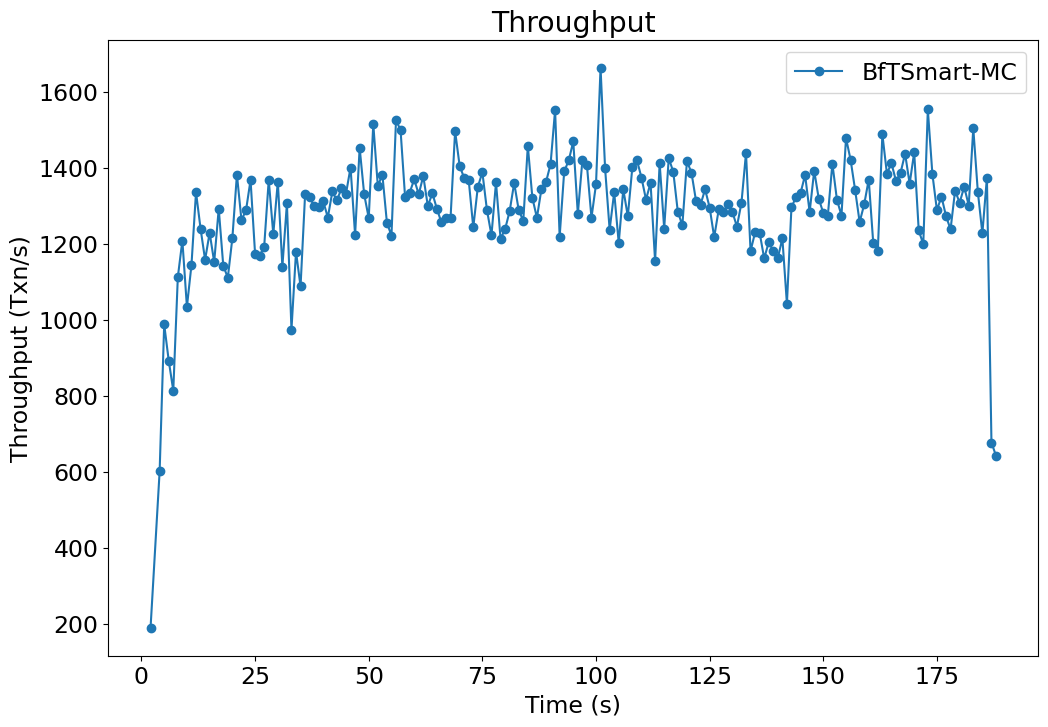

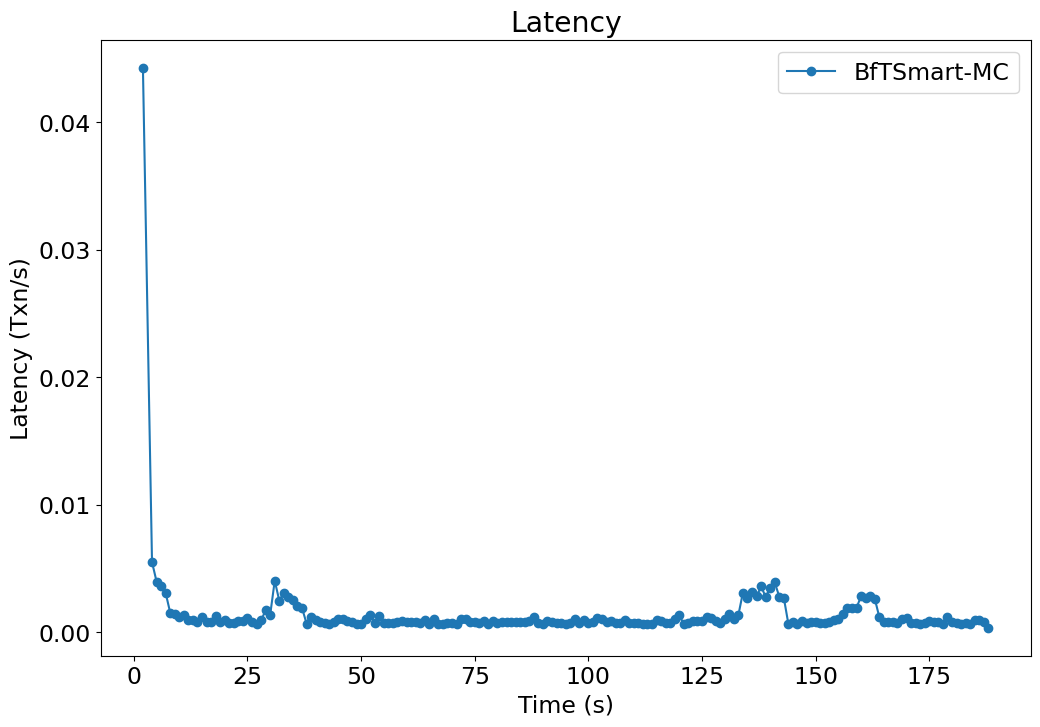

Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-00].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-01].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-02].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-03].
Deleted [https://www.googleapis.com/compute/v1/projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-04].
ERROR: (gcloud.compute.instances.delete) Could not fetch resource:
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-05' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-06' was not found
 - The resource 'projects/ucr-ursa-major-lesani-lab/zones/europe-west3-c/instances/resdb-07' was no

In [25]:
# # %%notify

for cfig in config_list:
    
    
    run_bftsmart_mc(cfig)
    
    
    os.system('gcloud compute instances delete --zone=europe-west3-c --quiet $(gcloud compute instances list --format="value(name)")')
    os.system('gcloud compute instances delete --zone=asia-south1-c --quiet $(gcloud compute instances list --format="value(name)")')
    os.system('gcloud compute instances delete --zone=us-west1-b --quiet $(gcloud compute instances list --format="value(name)")')